<a href="https://colab.research.google.com/github/KevinGomez26/Multi-Objective-Optimization-Portfolio-/blob/main/MOO_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Portfolio optimization**

By: Kevin Alejandro Hernández Gómez -- Cristian Alejandro Blanco Martinez


In [ ]:
# Download portfolio dataset from Kaggle
# Dataset with historical price information 
# for 3 high growth stocks and bitcoin from May 2013 to May 2019
# AMZN (Amazon), DPZ (Domino's Pizza), BTC (Bitcoin), NFLX (Netflix)
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d hershyandrew/amzn-dpz-btc-ntfx-adjusted-may-2013may2019

! unzip amzn-dpz-btc-ntfx-adjusted-may-2013may2019

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open amzn-dpz-btc-ntfx-adjusted-may-2013may2019, amzn-dpz-btc-ntfx-adjusted-may-2013may2019.zip or amzn-dpz-btc-ntfx-adjusted-may-2013may2019.ZIP.


In [ ]:
# libraries
import pandas

import matplotlib.pyplot as plt

import numpy

! pip install pymoo

from pymoo.core.problem import ElementwiseProblem

from pymoo.algorithms.moo.nsga2 import NSGA2

from pymoo.optimize import minimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


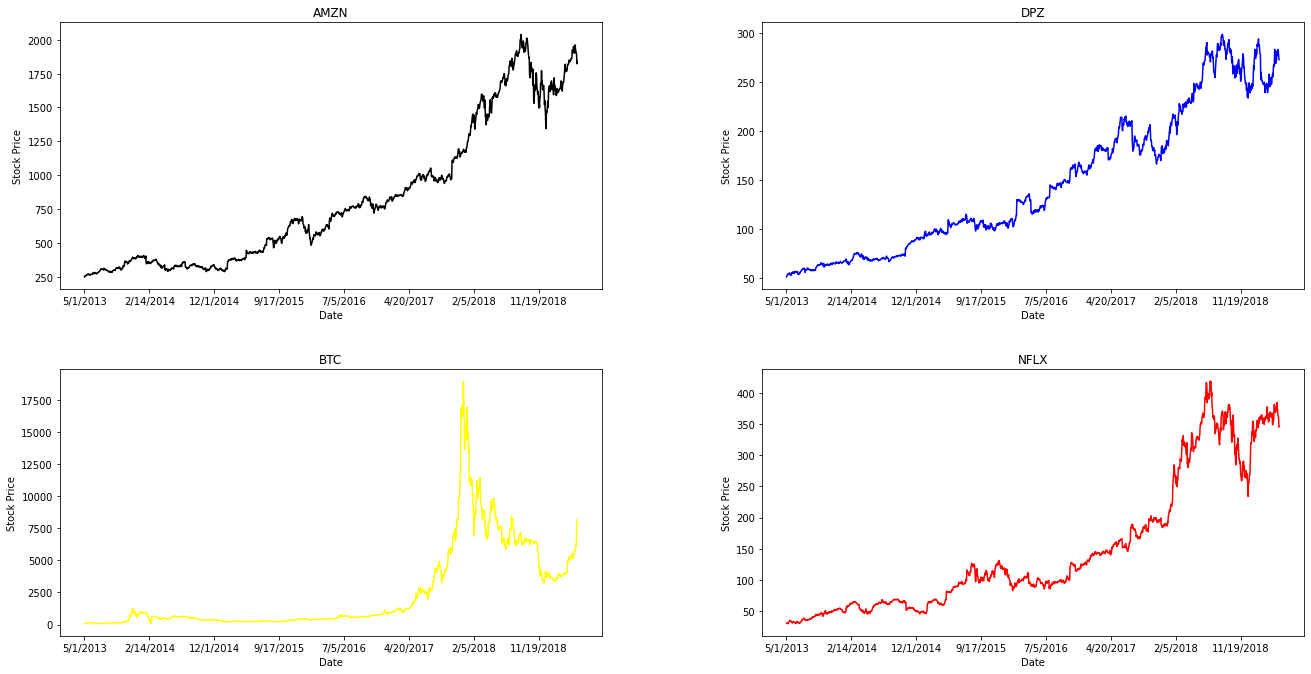

In [ ]:
# load dataset
data = pandas.read_csv('portfolio_data.csv')

# plot stock price
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(20)

data.plot('Date', 'AMZN', ax = axes[0, 0], legend = False, color = 'black')
axes[0, 0].set_title('AMZN')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Stock Price')
plt.subplots_adjust(hspace = 0.3)

data.plot('Date', 'DPZ', ax = axes[0, 1], legend = False, color = 'blue')
axes[0, 1].set_title('DPZ')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Stock Price')

data.plot('Date', 'BTC', ax = axes[1, 0], legend = False, color = 'yellow')
axes[1, 0].set_title('BTC')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Stock Price')

data.plot('Date', 'NFLX', ax = axes[1, 1], legend = False, color = 'red')
axes[1, 1].set_title('NFLX')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Stock Price')

plt.savefig('data.eps', format='eps')

For obtain period return  

$r_{t} = \left( \frac{p_{t+1} - p_{t}}{p_{t}} \right) 100\%$

# Nueva sección

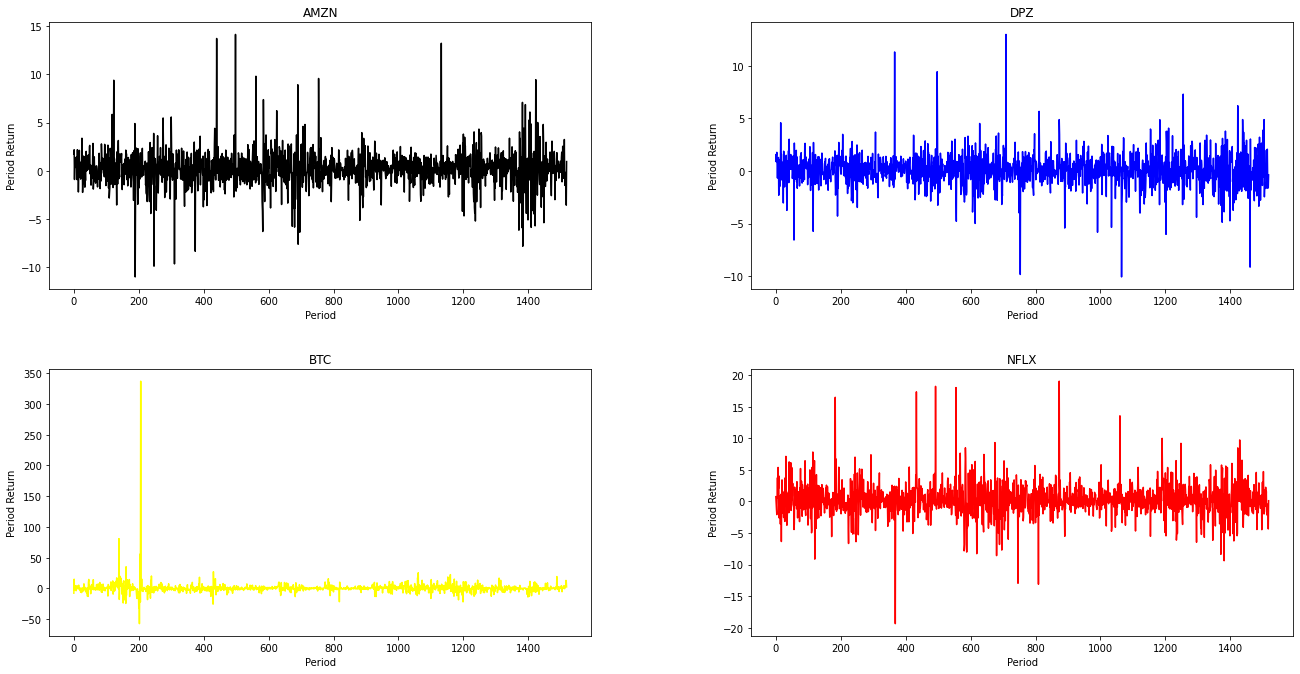

In [ ]:
# drop date column
data = data.drop('Date', axis = 'columns')

for column in data.columns:

  for i in range(len(data[column])):

    # convert stock price in period return 
    if i != len(data[column]) - 1: data[column][i] = ((data[column][i + 1] - data[column][i]) / data[column][i]) * 100

# drop last price (not converted)
data = data.drop(len(data) - 1)

# plot period return
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(20)

data.plot(y = 'AMZN',  use_index = True, ax = axes[0, 0], legend = False, color = 'black')
axes[0, 0].set_title('AMZN')
axes[0, 0].set_xlabel('Period')
axes[0, 0].set_ylabel('Period Return')
plt.subplots_adjust(hspace = 0.3)

data.plot(y = 'DPZ', use_index = True, ax = axes[0, 1], legend = False, color = 'blue')
axes[0, 1].set_title('DPZ')
axes[0, 1].set_xlabel('Period')
axes[0, 1].set_ylabel('Period Return')

data.plot(y = 'BTC', use_index = True, ax = axes[1, 0], legend = False, color = 'yellow')
axes[1, 0].set_title('BTC')
axes[1, 0].set_xlabel('Period')
axes[1, 0].set_ylabel('Period Return')

data.plot(y = 'NFLX', use_index = True, ax = axes[1, 1], legend = False, color = 'red')
axes[1, 1].set_title('NFLX')
axes[1, 1].set_xlabel('Period')
axes[1, 1].set_ylabel('Period Return')

plt.savefig('data_return.eps', format='eps')

Obtain expected returns and covariance matrix

$\mu_{r} = \frac{1}{N}\sum_{t} r_{t}$ 

$\sigma_{ij} = \frac{1}{N}\sum_{i}(r_{i}-\mu_{i})(r_{i}-\mu_{i})^{\top}$

In [ ]:
# expected return
u = data.mean()

print('expected returns:' + '\n\n', round(u, 3))

print('--------------------------------------------')

# covariance matrix of returns
s = data.cov()

print('covariance matrix:' + '\n\n', round(s, 3))

expected returns:

 AMZN    0.150
DPZ     0.123
BTC     0.584
NFLX    0.195
dtype: float64
--------------------------------------------
covariance matrix:

        AMZN    DPZ      BTC   NFLX
AMZN  3.603  0.935   -0.112  2.237
DPZ   0.935  2.511    0.259  1.063
BTC  -0.112  0.259  109.436  0.068
NFLX  2.237  1.063    0.068  7.144


Objective: \\
$\max w^{\top} \mu_{r}$ and $\min w^{\top} \sigma w$ \\
subject to: \\
$1^{\top}w = 1$ \\
$0 < w_{i} \leq 1$

In [ ]:
# set random c for choose a subset of assets 
#c = numpy.random.randint(low = 0, high = 2, size = len(u))

c = numpy.array([0, 0, 1, 1])

index = numpy.where(c == 0)

print(index)

# subset of return assets
u = numpy.array(u)

u = numpy.delete(u, index)

# subset covariance marix
s = numpy.array(s)

s = numpy.delete(s, index, axis = 0)

s = numpy.delete(s, index, axis = 1)

# assets
assets = numpy.array(['AMZN', 'DPZ', 'BTC', 'NFLX'])

assets = numpy.delete(assets, index)

(array([0, 1]),)


In [ ]:
# define class problem - model
class MyProblem(ElementwiseProblem):

    def __init__(self):

        # set dimensionality, number of objective functions, 
        #number of constraints and variable lower and upper limits
        super().__init__(n_var = len(u),
                         n_obj = 2,
                         n_constr = 1,
                         xl = numpy.zeros(len(u)),
                         xu = numpy.ones(len(u)))

    def _evaluate(self, w, out, *args, **kwargs):

        # define objective functions

        # maximize profit
        profit = u @ w

        # minimize risk
        risk = w @ s @ w

        # define equal to zero constraint
        constraint = numpy.ones(len(u)) @ w - 1

        out["F"] = numpy.column_stack([-profit, risk])

        out["G"] = constraint

In [ ]:
problem = MyProblem()

algorithm = NSGA2()

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=True)
print(res.X)
print(res.F)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     24 |  0.000000E+00 |  0.1733511850 |             - |             -
     2 |      200 |     42 |  0.000000E+00 |  0.000000E+00 |  0.0253816063 |         ideal
     3 |      300 |     62 |  0.000000E+00 |  0.000000E+00 |  0.0595786160 |         ideal
     4 |      400 |     87 |  0.000000E+00 |  0.000000E+00 |  0.0092200418 |         ideal
     5 |      500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.1384114005 |         ideal
     6 |      600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0021102613 |             f
     7 |      700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0111241614 |         nadir
     8 |      800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0019270813 |             f
     9 |      900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0033961091 |             f
    10 |     1000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0029021754 |         nadir

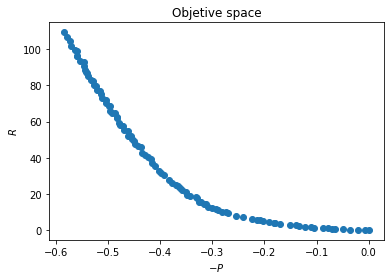

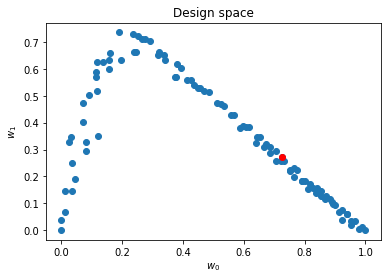

In [ ]:
# plot objective space
plt.figure(1)
plt.scatter(res.F[:, 0], res.F[:, 1])
plt.title('Objetive space')
plt.xlabel('$- P$')
plt.ylabel('$R$')

plt.savefig('objetive_space.eps', format='eps')

# plot design space
plt.figure(2)
plt.scatter(res.X[:, 0], res.X[:, 1])
plt.scatter(res.X[-1][0], res.X[-1][1], color = 'red', label = 'Obtimal point')
plt.title('Design space')
plt.xlabel('$w_{0}$')
plt.ylabel('$w_{1}$')

plt.savefig('design_space.eps', format='eps')

Final result, percentage of mount to invest in each

In [ ]:
for i, w in enumerate(res.X[-1]):

  print(assets[i] + ': ' +  str(int(round(w * 100, 0))) + '%')


BTC: 73%
NFLX: 27%


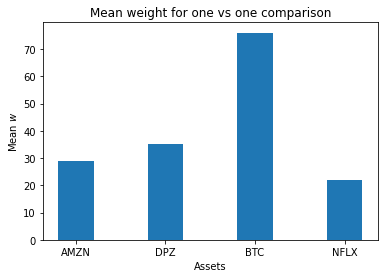

In [ ]:
# creating the dataset
data = {'AMZN':29, 'DPZ':35, 'BTC':76, 'NFLX':22}
courses = list(data.keys())
values = list(data.values())
 
# creating the bar plot
plt.figure(3)
plt.bar(courses, values, width = 0.4)
plt.xlabel("Assets")
plt.ylabel("Mean $w$")
plt.title("Mean weight for one vs one comparison")

plt.savefig('mean_weight.eps', format='eps')